In [9]:
#imports
import os 
from dotenv import load_dotenv
from huggingface_hub import login
from datasets import load_dataset , Dataset , DatasetDict
import pandas as pd


In [4]:
#environment
load_dotenv(override=True)

True

In [5]:
#hugging face login
hf_token = os.getenv("HF_TOKEN")
login(hf_token , add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [6]:
#loading the small dataset for structure checking and curation

dataset=load_dataset("McAuley-Lab/Amazon-Reviews-2023",f"raw_meta_Automotive",split='full',
                     trust_remote_code=True)

print(f"Number of Application ;{len(dataset):,}")

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'McAuley-Lab/Amazon-Reviews-2023' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
Using the latest cached version of the dataset since McAuley-Lab/Amazon-Reviews-2023 couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'raw_meta_Automotive' at /Users/vishesh/.cache/huggingface/datasets/McAuley-Lab___amazon-reviews-2023/raw_meta_Automotive/0.0.0/16b76e0823d73bb8cff1e9c5e3e37dbc46ae3daee380417ae141f5e67d3ea8e8 (last modified on Tue Jul  1 09:20:21 2025).


Number of Application ;2,003,129


In [16]:
#TODO:Looking at the dataset to see what has to be done
df = pd.DataFrame([dataset[10]])
df

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
0,Automotive,Sherman Replacement Part Compatible with Cadil...,3.8,22,[Package Dimensions: 52.07 cms (L) x 66.04 cms...,"[Product description, RH INR FRT WHL SHIELD / ...",136.47,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Sherman,"[Automotive, Replacement Parts, Body & Trim, B...","{""Brand"": ""Sherman"", ""Color"": ""Black"", ""Exteri...",B004GDKLHO,None,None,None


In [27]:
keys = df.columns.tolist()
print(keys)

['main_category', 'title', 'average_rating', 'rating_number', 'features', 'description', 'price', 'images', 'videos', 'store', 'categories', 'details', 'parent_asin', 'bought_together', 'subtitle', 'author']


In [ ]:
print(dataset[99]["title"]) #does the naming of the product
print(dataset[99]["features"])  #will give as the name says features
print(dataset[99]["description"]) #this is the meat of the dataset
print(dataset[99]["price"]) #final result 
print(dataset[99]["details"]) #most importantly gives manufacturer and brand , other things are good to have but not necessary

Rareelectrical NEW REGULATOR COMPATIBLE WITH CASE FARM TRACTOR 840 841 930 931 940 941 701 710 800B 810 811-B
['Compatible with CASE, CAT, DELCO and many more... Please verify your OEM part number from your original unit to help ensure fitment.', 'Replaces: DELCO: 1118792 1118991 D649, ITEM DESCRIPTION: VOLTAGE REGULATOR, UNIT TYPE: DELCO, VOLTAGE: 12, TERMINAL COUNT: 3, ADJUSTABLE: NON-ADJUSTABLE, CIRCUIT TYPE: A-CIRCUIT, POLARITY: NEGATIVE OR POSITIVE, TERMINAL ID: BATTERY-GENERATOR-FIELD, AMPERAGE: 15-18, SPECIFICATIONS: BRUSH HOLDER NOT INCLUDED, SPECIFICATIONS: RECTIFIER NOT INCLUDED, SPECIFICATIONS: ...', 'Replaces: INCLUDED, SPECIFICATIONS: TOLERANCE RING NOT INCLUDED, WEIGHT: 3 LBS ...', 'Computer tested for consistent Quality and unsurpassed reliability', 'Voltage Regulator - Voltage: 12V Adjustable: Non-Adjustable Circuit Type: A-Circuit Terminal Count: 3 Source: Aftermarket']
['RAREELECTRICAL BRAND COMPATIBLE WITH CASE, CAT, DELCODELCO: 1118792 1118991 D649ITEM DESCRIPTION: 

In [35]:
#checking which of them has a price 
#using try except block avoids the None value error 
prices = 0 
for data in dataset:
    try:
        price = float(data["price"])
        if price > 0 :
            prices += 1 
    except ValueError as e:
        pass

print(f"There are {prices:,} with a valid price , which is {prices/len(dataset)*100:,.1f}")

There are 1,131,965 with a valid price , which is 56.5


In [38]:
#content we want to include from the dataset into our prompt
# title , description , features , details and atlast price
#to analyse the token we need the length of the prompt 

prices =[] 
lengths =[]
for data in dataset:
    try :
        price = float(data["price"])
        if price > 0 :
            #adding to price list
            prices.append(price)
            #converting to string to concetinate 
            content = data["title"] + str(data["description"]) + str(data["features"]) + data["details"] 
            lengths.append(len(content))
    except ValueError as e:
        pass

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#data plot of lengths
plt.hist(lengths,rwidth = 0.8 ,color= 'lightpink' ,bins=range(0,5000,200))
plt.title(f"Lengths: Avg = {sum(lengths)/len(lengths):,.0f} and highest = {max(lengths)} ")

Text(0.5, 1.0, 'prices: Avg 82 and highest 15799.0 ')

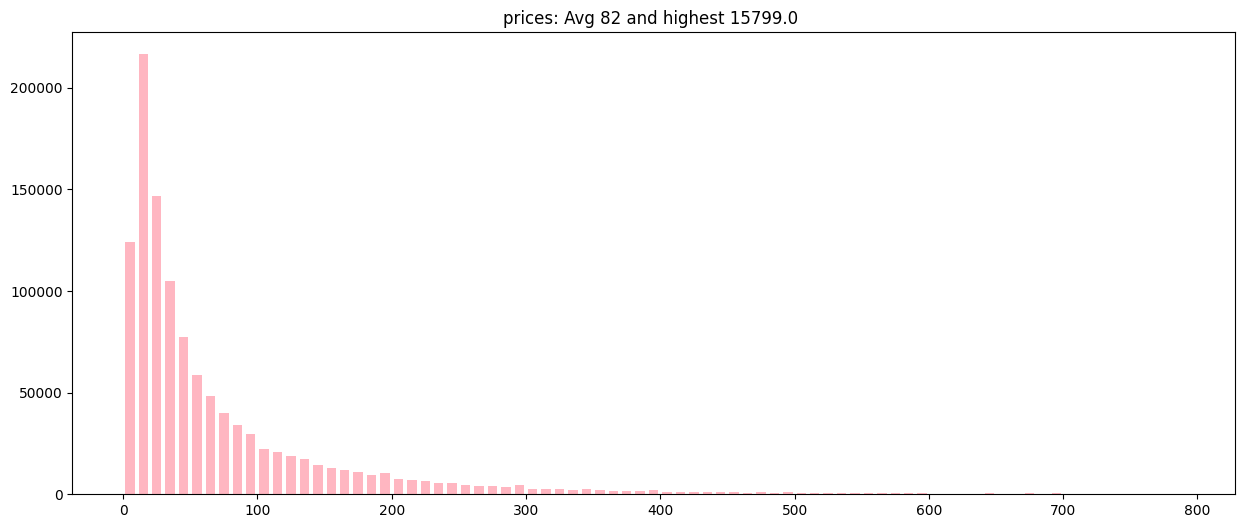

In [78]:
#data plot of prices
plt.figure(figsize=(15,6))
plt.hist(prices,rwidth = 0.7 ,color= 'lightpink' ,bins=range(0,800,10))
plt.title(f"prices: Avg {sum(prices)/len(prices):,.0f} and highest {max(prices)} ")

In [79]:
#looking at the highest product
for data in dataset :
    try :
        price = float(data["price"]) 
        if price > 15788 :
            print(data['title']) 
            exit
    except ValueError as e:
        pass 

{'main_category': None, 'title': 'US Stock 2000 W Laser Rust Removal Machine 220V MAX Laser Cleaning Machine Laser Cleaner Laser Rust Remover for Metal, Rust,Oil,Coating', 'average_rating': 5.0, 'rating_number': 3, 'features': ['[Parameters]: Laser Brand: MAX; Laser Source Power(W): 2000; Laser Wavelength: 1080±10nm; Scanning Width: 160±10mm; Laser Type: Continuous/Modulation; Maximum Modulation Frequency: 20KHz; Output Power(KW): 10; Cleaning Efficiency: 15-45㎡/h; Cable Length: 32ft(Customizable 49ft/65ft); Voltage: 220V 1-Phase; Cooling Method: Water Cooling (Medium: Deionized Water, Distilled Water or Purified Water) Package Dimensions: 1120*565*1050mm; Water Tank Capacity: 16L (14-15L of Water to be Added)', '[TIME AND COST SAVING]: High quality handheld laser cleaning machine can provide non-contact cleaning and can be used in any Space and location. Laser Cleaning Machine is environment friendly to be used without damaging the base material.', '[CONVENIENT TO USE]: Double-click t